In [1]:
import pandas as pd
import pymysql 
import matplotlib.pyplot as plt
import numpy as np   
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [2]:
from sqlalchemy import create_engine 
engine = create_engine('mysql+pymysql://root:@localhost/apple')

df = pd.read_sql_table('my_potential_clients', con=engine)

print(df)
print(type(df))


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15566689  Female   35            57000          0
1    15569641  Female   58            95000          1
2    15570769  Female   26            80000          0
3    15570932    Male   34           115000          0
4    15571059  Female   33            41000          0
..        ...     ...  ...              ...        ...
395  15813113    Male   40           107000          1
396  15814004    Male   27            20000          0
397  15814553    Male   57            60000          1
398  15814816    Male   31            66000          0
399  15815236  Female   45           131000          1

[400 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>


### Récupérer les données

In [3]:
df.groupby('Gender').mean()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,1.569331e+07,38.411765,71759.803922,0.377451
Male,1.568970e+07,36.867347,67642.857143,0.336735


In [4]:
df.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


### Visualisation des données avec Matpotlib

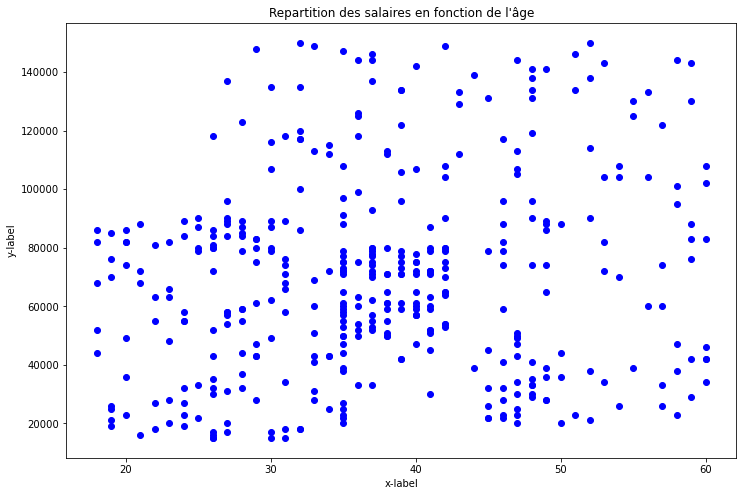

In [5]:
plt.figure(figsize =(12,8))
plt.title("Repartition des salaires en fonction de l'âge")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.scatter (df.Age,df.EstimatedSalary,color ='b')

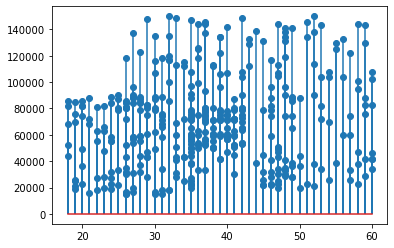

In [6]:
plt.stem(df.Age,df.EstimatedSalary, use_line_collection= True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d5a8fd2b0>,
      dtype=object)

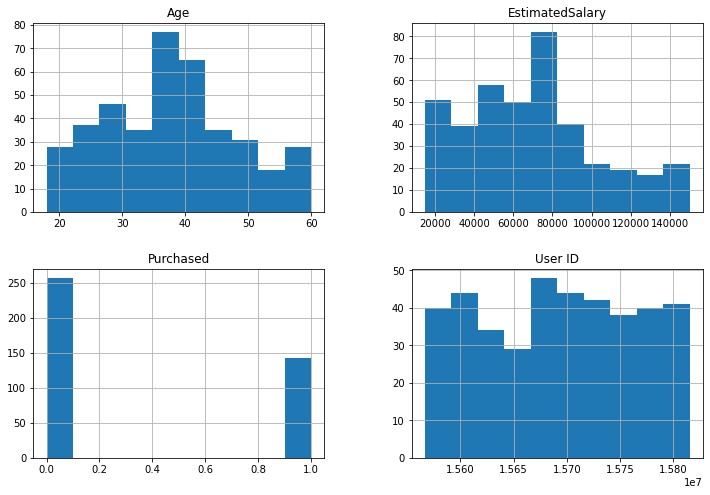

In [7]:
df.hist(figsize = (12,8))

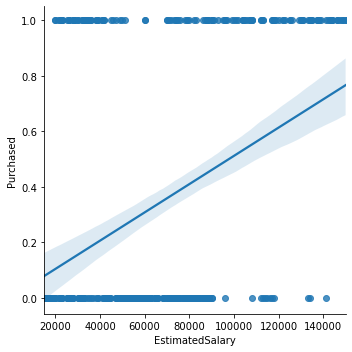

In [8]:
sns.lmplot(x="EstimatedSalary", y="Purchased", data=df);

### Afficher les données avec Seaborn

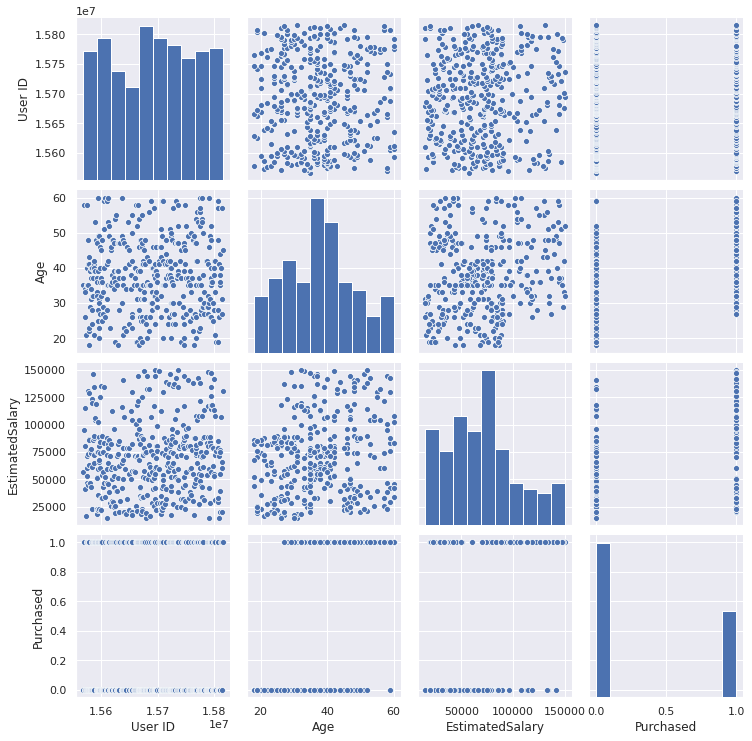

In [9]:
sns.set()
sns.pairplot(df)

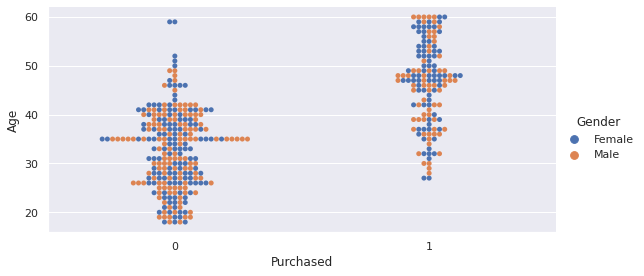

In [10]:
sns.catplot (x = 'Purchased', y= 'Age',data = df, kind = 'swarm',hue ='Gender',aspect=2, height =4)

### Régression Logistique:

In [11]:
df_getdummy=pd.get_dummies(data=df, columns=['Gender'])
df_getdummy.head() 

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15566689,35,57000,0,1,0
1,15569641,58,95000,1,1,0
2,15570769,26,80000,0,1,0
3,15570932,34,115000,0,0,1
4,15571059,33,41000,0,1,0


In [12]:
X = df_getdummy.drop('Purchased',axis=1)#axis=0 for rows
y = df_getdummy['Purchased'] #purshasing an iphone didn't depend on gender nor client id

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#sharing data set into test values ans training values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logReg = LogisticRegression(random_state = 0)
logReg.fit(X_train, y_train)
print(logReg.score(X_train, y_train))
print(y_test)

0.84375
274    1
356    0
272    1
363    1
147    0
      ..
41     1
77     1
53     1
8      1
223    1
Name: Purchased, Length: 80, dtype: int64


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_train, y_pred=logReg.predict(X_train)) 
accuracy_score(y_true=y_test, y_pred=logReg.predict(X_test))

0.85

In [15]:
y_predict= logReg.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[45  2]
 [10 23]]


In [17]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.344690
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.471     
Dependent Variable: Purchased        AIC:              285.7524  
Date:               2020-11-20 12:21 BIC:              305.7097  
No. Observations:   400              Log-Likelihood:   -137.88   
Df Model:           4                LL-Null:          -260.79   
Df Residuals:       395              LLR p-value:      5.1742e-52
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
User ID          -0.0000   0.0000 -0.3014 0.7631  -0.0000  0.0000
Age               0.2370   0.0264  8.9817 0.0000   0.1853  0.2887


In [23]:
import seaborn as sns

sns.set_theme(style="darkgrid")

df1 = sns.load_dataset("df")

pal = dict(male="#6495ED", female="#F08080")

g = sns.lmplot(x="EstimatedSalary", y="Purchased", col="", hue="", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [21]:
xx= np.linspace(15, 70,1000)
xx=xx.reshape(-1,1)

loss= logReg.predict_proba(xx)[:,1]
plt.figure()
plt.scatter(x1, y, color='black', zorder=20)
plt.plot(xx, loss, color='red', linewidth=3)

plt.grid()
plt.show()

ValueError: X has 1 features per sample; expecting 5